In [1]:
from standardInclude import *

Welcome to JupyROOT 6.20/04
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


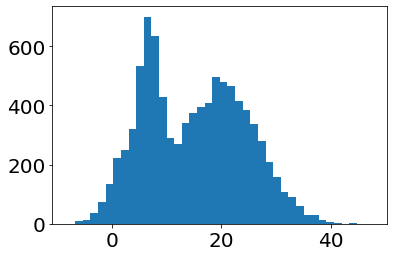

In [2]:
raw_data = list(np.random.normal(2,3,1000)) + list(np.random.normal(7,2,2000)) + list(np.random.normal(20,7,6000))
plt.hist(raw_data,bins=40)
raw_data = np.array(raw_data).reshape(-1,1)

In [3]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='linear', bandwidth=0.2).fit(raw_data)

/home/jlab/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jlab/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jlab/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jlab/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


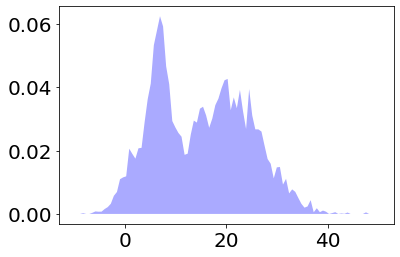

In [4]:
samples = np.linspace(-10,50,100).reshape([-1,1])
log_dens = kde.score_samples(samples)
plt.fill(samples[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.show()

---

### Lets implement the kernel from kevin labe's docdb 

https://gm2-docdb.fnal.gov/cgi-bin/private/RetrieveFile?docid=21285&filename=randomization.pdf&version=2

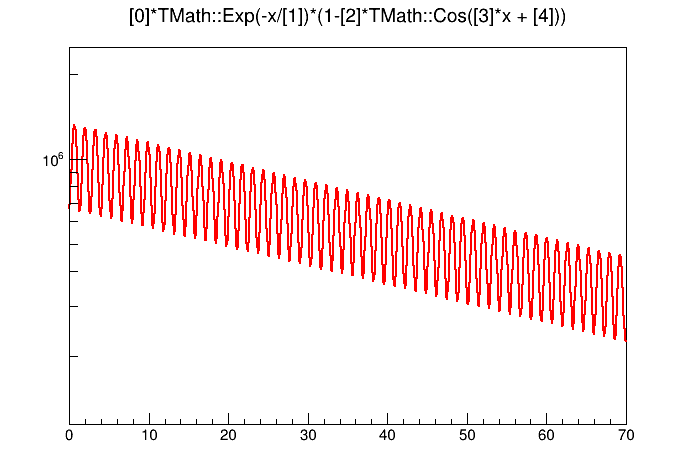

In [5]:
hist = r.TH1D("h","Normal Function", 4700,0,700)

func = r.TF1("func","[0]*TMath::Exp(-x/[1])*(1-[2]*TMath::Cos([3]*x + [4]))",0,700,5)
func.SetParameters(1000000,64.4, 0.3333, 1/0.21, 0)
func.SetNpx(10000)
#hist.FillRandom("func",10000)

c = r.TCanvas()
func.Draw()
func.GetXaxis().SetRangeUser(0,70)
c.SetLogy()
c.Draw()

In [16]:
def kern_func(x, Tc):
    func = r.TF1("kernel_function","1-"+str(Tc)+"/2.0",x-Tc/2, x+Tc/2)
    
    return func

def kern_bin_weights(hist, x, Tc):
    kern = kern_func(x,Tc)
    bincenter = hist.GetBinCenter(hist.FindBin(x))
    func = r.TF1("func", "(1) - TMath::Abs((x-[0]))/[1]", x-Tc, x+Tc,2)
    func.SetParameter(0,x)
    func.SetParameter(1,Tc)
    func.SetNpx(1000)
    
    return func

def fill_kern(hist,x):
    '''
        Fills a root histogram with the kernel function: K(t) = 1/Tc on the range t − Tc/2 to t + Tc/2
    '''
    
    Tc = 0.149 #microseconds
    tlow = x-Tc/2
    thigh= x+Tc/2
    binlow = hist.FindBin(xi - Tc/2)
    binhigh = hist.FindBin(xi+Tc/2)
    weight_func = kern_bin_weights(hist,x,Tc)
    print(x,1)
    for bini in range(binlow,binhigh+1):
        binboundary = hist.GetBinCenter(bini) - hist.GetBinWidth(bini)/2.0
        binboundary_high = hist.GetBinCenter(bini) + hist.GetBinWidth(bini)/2.0
        weight = weight_func.Integral(binboundary, binboundary_high)
        hist.AddBinContent(bini, weight)
        print("   ", hist.GetBinCenter(bini), weight)
    #print(binlow,binhigh, tlow, thigh)

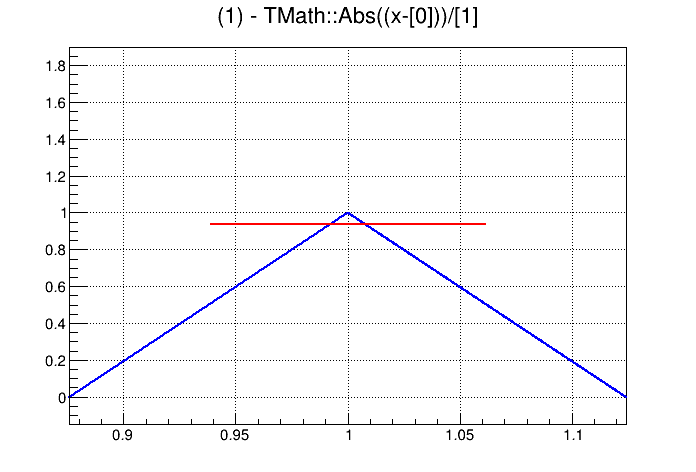

In [17]:
c = r.TCanvas()
func = kern_func(1,0.124)
func2 = kern_bin_weights(hist, 1,0.124)
func2.SetLineColor(4)
func2.GetXaxis().SetRangeUser(0.1,1.9)
func2.GetYaxis().SetRangeUser(-0.15,1.9)
func2.Draw()
func.Draw("same")
c.SetGrid()
c.Draw()

In [19]:
func.Integral(1.11,1.12)

0.009380000000000008

In [8]:
1-0.124

0.876

In [9]:
%%time

func = r.TF1("func","[0]*TMath::Exp(-x/[1])*(1-[2]*TMath::Cos([3]*x + [4]))",0,700,5)
func.SetParameters(1000000,64.4, 0.3333, 1/0.21, 0)
func.SetNpx(10000)

h = r.TH1D("h","Normal Function", 4700,0,700)
h_k = r.TH1D("h_k","Example Kernel Function", 4700,0,700)
h_k.SetLineColor(2)

for i in range(100):
    xi = func.GetRandom()
    #print(xi)
    h.Fill(xi)
    fill_kern(h_k, xi)


527.4015039756906 1
    527.3085106382978 0.05598267003424932
    527.4574468085106 0.09071404777420077
11.398417573249692 1
    11.393617021276595 0.11156341183247265
    11.542553191489361 0.004862297918365448
21.459691011634728 1
    21.372340425531913 0.06162300403831058
    21.52127659574468 0.08626315095386637
189.38293674836046 1
    189.37234042553192 0.11096450741478492
    189.52127659574467 0.010655585936111826
16.90565640355125 1
    16.904255319148934 0.11170490352206737
    17.0531914893617 0.0014642866381338012
42.76755163803036 1
    42.670212765957444 0.05163899692839809
    42.81914893617021 0.09385041937556479
203.38286101821313 1
    203.37234042553192 0.11097524021428234
    203.52127659574467 0.010579888230655608
87.80417151302218 1
    87.79787234042553 0.11145177239522071
    87.9468085106383 0.006360276551070322
49.96038359967452 1
    49.81914893617021 0.007762009920006306
    49.96808510638297 0.11132000306516114
86.672091508782 1
    86.6063829787234 0.08274

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


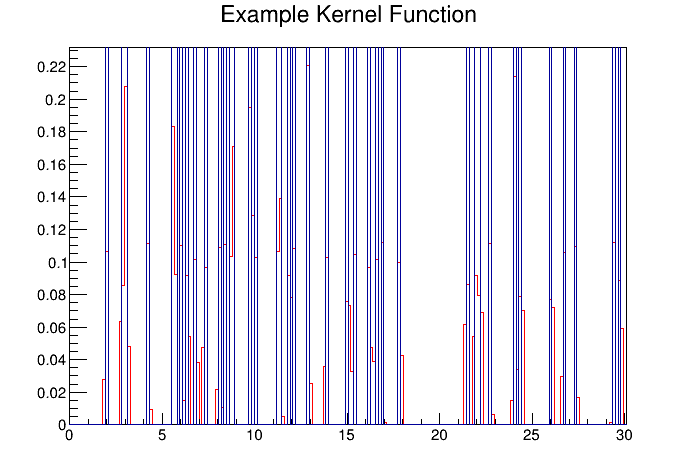

In [10]:
c = r.TCanvas()
h_k.Draw()
h_k.GetXaxis().SetRangeUser(0,30)
h.Draw("same")
c.Draw()

In [11]:
import sympy
x = sympy.symbols('x')
Tc = sympy.symbols("Tc")
f = 1-Tc/2.0

In [12]:
print(f)

1 - 0.5*Tc


In [13]:
from sympy import oo, Symbol, integrate
def convolve(f, g, t, lower_limit=-oo, upper_limit=oo):
    tau = Symbol('__very_unlikely_name__', real=True)
    return integrate(f.subs(t, tau) * g.subs(t, t - tau), 
                     (tau, lower_limit, upper_limit))